In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

### 3. Основные методы поиска оценок. Задача 2.
Условие: На высоте 1 метр от поверхности Земли закреплено устройство, которое периодически излучает лучи на поверхность Земли (считайте, что поверхность Земли представляет из себя прямую). Пусть $l$ - перпендикуляр к поверхности Земли, опущенный из точки, в которой закреплено устройство. Угол к прямой $l$ (под которым происходит излучение) устройство выбирает случайно из равномерного распредления на отрезке $( -\pi/2, \pi/2)$ (все выборы осуществляются независимо). В этих предположениях точки пересечения с поверхностью имеют распределение Коши с плотностью $ p(x) = \frac{1}{\pi(1+(x - x_0)^2)} $. Неизвестный параметр сдвига $x_0$ соответствует проекции точки расположения устройства на поверхность Земли (направление оси и начало координат на поверхности Земли выбраны заранее некоторым образом независимо от расположения устройства). В файле Cauchy.csv находятся координаты точек пересечения лучей с поверхностью Земли. 

Оцените параметр сдвига методом максимального правдоподобия
а) по половине выборки (первые 500 элементов выборки, т.е. выборка состоит из 1000 наблюдений);
б) по всей выборке.
Оценку произведите по сетке (т.е. возьмите набор точек с некоторым шагом и верните ту, на которой достигается максимум функции правдоподобия). Известно, что параметр масштаба принадлежит интервалу $[-1000, 1000]$. Выберите шаг равным $0.01$. Если получается долго или не хватает памяти, то уменьшите интервал поиска и поясните (в комментариях), почему берете именно такой интервал.

In [2]:
#Считываем данные из файла Cauchy.csv
data = []

file = open('Cauchy.csv', 'r')
for str in file:
    for c in str.split():
        data.append(float(c))
file.close()

#### План решения:
Из условия задачи, плотность распределения Коши задается формулой:
$$ p(x) = \frac{1}{\pi(1+(x - x_0)^2)} $$

Функция правдоподобия имеет вид: 
$$ f = \frac{1}{\pi(1+(x_1 - x_0)^2)} \cdot \frac{1}{\pi(1+(x_2 - x_0)^2)} \cdot ... \cdot \frac{1}{\pi(1+(x_N - x_0)^2)} =  \frac{1}{\pi^N \prod_{i=1}^N (1+(x_i - x_0)^2)} $$

Логарифмическая функция правдоподобия имеет вид: 
$$ L(x, x_0) = -N\log(\pi) - \log\prod_{i=1}^N (1+(x_i - x_0)^2) $$ 

Продифференцируем её:
$$ \frac{\partial L}{\partial x_0} = \sum_{i=1}^{N}\frac{2(x-x_0)}{(1+(x-x_0)^2)}  = 0 $$
  
Решить данное уравнение обычными методами довольно сложно, поэтому будем искать по сетке значение $x$, в котором достигается максимум функции правдоподобия (как и предложено в условии).

In [3]:
#из условия известно, что параметр масштаба принадлежит интервалу [-1000, 1000]
#и шаг следует выбрать равным 0.01
x = np.arange(-1000, 1000, 0.01)

In [4]:
#Функция вычисления логарифмической функции правдоподобия
#n - количество элементов из выборки
def logLikelihoodFunction(n):
    L = np.zeros(len(x))
    for k in range(len(x)):
        for i in data[0:n]:
            L[k] -= np.log((np.pi * (1 + (i - x[k]) ** 2)))
    return L

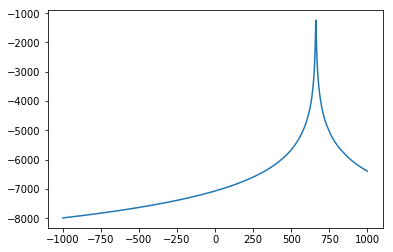

In [5]:
#Оценим параметр сдвига по половине выборки:
L = logLikelihoodFunction(500)

#Построим график
plt.plot(x, L)
plt.show()

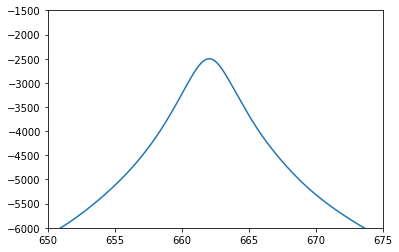

Значение максимума функции достигается в точке  [662.05]


In [21]:
plt.plot(x, L)
plt.ylim([-6000, -1500])
plt.xlim([650, 675])
plt.show()

arg_max = x[np.where(L == max(L))]
print("Значение максимума функции достигается в точке ", arg_max)

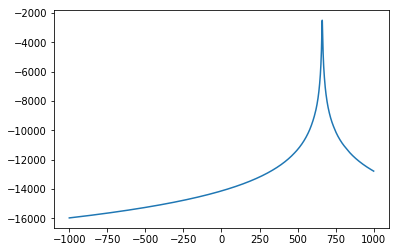

In [7]:
#Оценим параметр сдвига по полной выборке:
L = logLikelihoodFunction(1000)

#Построим график
plt.plot(x, L)
plt.show()

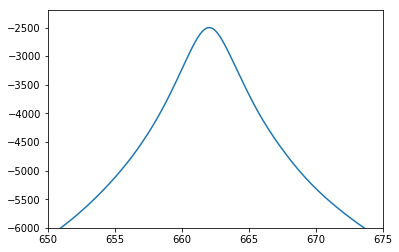

Значение максимума функции достигается в точке  [662.05]


In [25]:
plt.plot(x, L)
plt.ylim([-6000, -2200])
plt.xlim([650, 675])
plt.show()

arg_max = x[np.where(L == max(L))]
print("Значение максимума функции достигается в точке ", arg_max)

# Вывод:

Значение параметра сдвига получилось равным 662 при рассмотрении как половины, так и всей выборки.